## LIBRERÍAS
Importar librerías como pandas, numpy y matplotlib para el análisis y visualización de datos.

In [252]:
import pandas as pd  # Para manipulación y análisis de datos
import numpy as np  # Para cálculos numéricos y manejo de arrays
import matplotlib.pyplot as plt  # Para visualización de datos
import seaborn as sns

# Configuración opcional para gráficos más claros
plt.style.use('ggplot')  # Estilo de gráficos
plt.rcParams['figure.figsize'] = (10, 6)  # Tamaño predeterminado de las figuras

## INGESTA DE DATOS

In [253]:
# Cargar el conjunto de datos desde un archivo CSV
ruta_archivo = 'Datos/despachos.csv'
df = pd.read_csv(ruta_archivo)
# Mostrar las primeras filas del DataFrame para verificar la carga
df.head()

,FECHA_INICIAL,HORA_INICIAL_PLAN,HORA_INICIAL_REAL,HORA_INICIAL_AUX,FECHA_FINAL,HORA_FINAL_PLAN,HORA_FINAL_REAL,HORA_FINAL_AUX,FK_RUTA,PASAJEROS,DISTANCIA,FK_VEHICULO,FK_CONDUCTOR,ESTADO_DESPACHO,PK_INTERVALO_DESPACHO,PK_INFORMACION_REGISTRADORA
0,2024-04-16,4:02:00,NaN,0:00:00,2024-04-16,6:02:00,5:43:49,5:43:49,5,49,35400,51,38,2,244808,347194
1,2024-04-16,4:27:00,NaN,0:00:00,2024-04-16,7:26:00,6:17:02,6:00:50,3,49,33200,28,72,2,244812,347197
2,2024-04-16,4:50:00,4:56:47,4:56:47,2024-04-16,7:01:00,6:12:07,6:12:07,6,28,27200,66,304,2,244814,347198
3,2024-04-16,4:12:00,NaN,0:00:00,2024-04-16,7:11:00,6:16:04,6:16:04,3,41,42800,22,321,2,244810,347199
4,2024-04-16,5:00:00,5:00:12,5:00:12,2024-04-16,7:00:00,6:35:30,6:35:30,5,34,31800,47,307,2,244818,347201


## TRANSFORMACIÓN: DATOS ATÍPICOS, FALTANTES Y FORMATOS

#### Duplicados

In [254]:
## Listar los registros duplicados
duplicados = df[df.duplicated()]
duplicados

# No hay presencia de datos duplicados

,FECHA_INICIAL,HORA_INICIAL_PLAN,HORA_INICIAL_REAL,HORA_INICIAL_AUX,FECHA_FINAL,HORA_FINAL_PLAN,HORA_FINAL_REAL,HORA_FINAL_AUX,FK_RUTA,PASAJEROS,DISTANCIA,FK_VEHICULO,FK_CONDUCTOR,ESTADO_DESPACHO,PK_INTERVALO_DESPACHO,PK_INFORMACION_REGISTRADORA


### 1.1. CREACIÓN DE CARACTERÍSTICAS INICIALES:

In [255]:
df['FECHA_INICIAL'] = pd.to_datetime(df['FECHA_INICIAL'])
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dias_es = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
dias_dict = dict(zip(dias_ordenados, dias_es))
df['DIA_SEMANA'] = df['FECHA_INICIAL'].dt.day_name().map(dias_dict)

### PASAJEROS

Estadísticas descriptivas del campo 'PASAJEROS':
count    56065.000000
mean        46.164916
std         16.310592
min          1.000000
25%         36.000000
50%         45.000000
75%         55.000000
max        868.000000
Name: PASAJEROS, dtype: float64


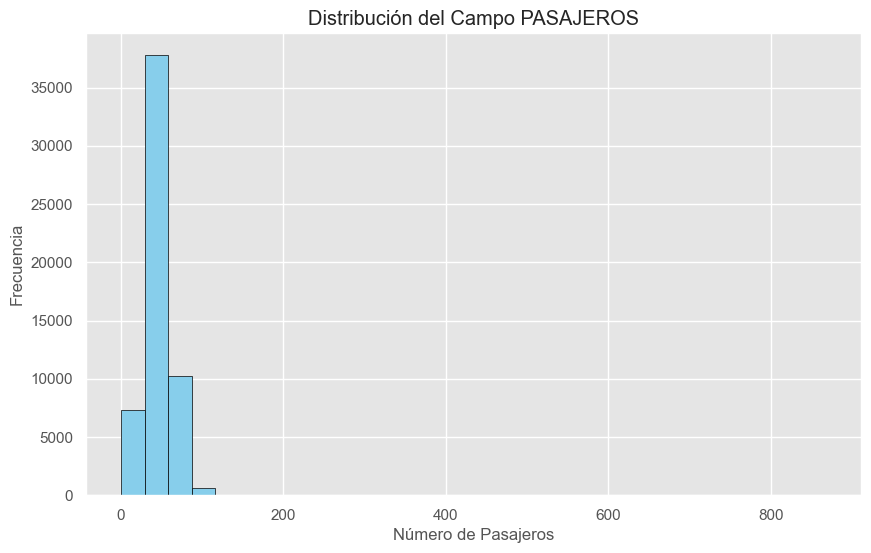

In [256]:
# Calcular estadísticas descriptivas para el campo 'PASAJEROS'
estadisticas_pasajeros = df['PASAJEROS'].describe(percentiles=[0.25, 0.5, 0.75])

print("Estadísticas descriptivas del campo 'PASAJEROS':")
print(estadisticas_pasajeros)

# Visualizar la distribución del campo 'PASAJEROS' con un histograma
plt.hist(df['PASAJEROS'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución del Campo PASAJEROS')
plt.xlabel('Número de Pasajeros')
plt.ylabel('Frecuencia')
plt.show()

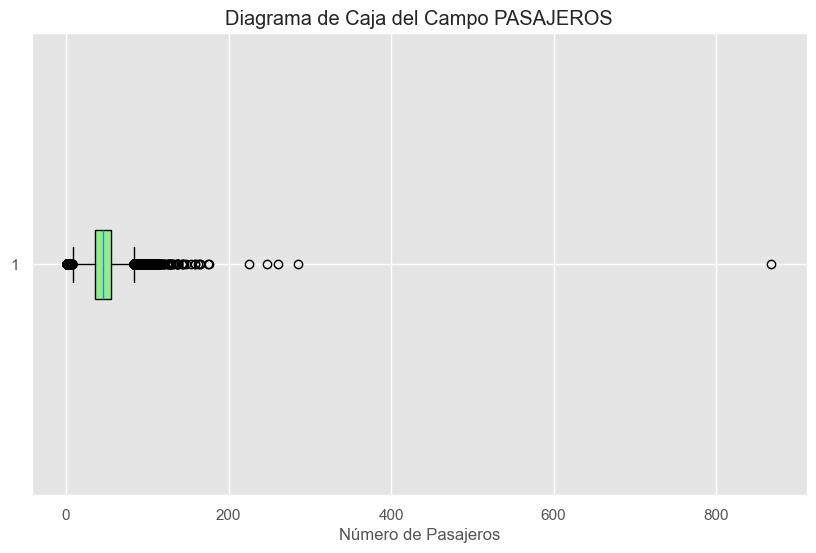

In [257]:
plt.boxplot(df['PASAJEROS'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Diagrama de Caja del Campo PASAJEROS')
plt.xlabel('Número de Pasajeros')
plt.show()

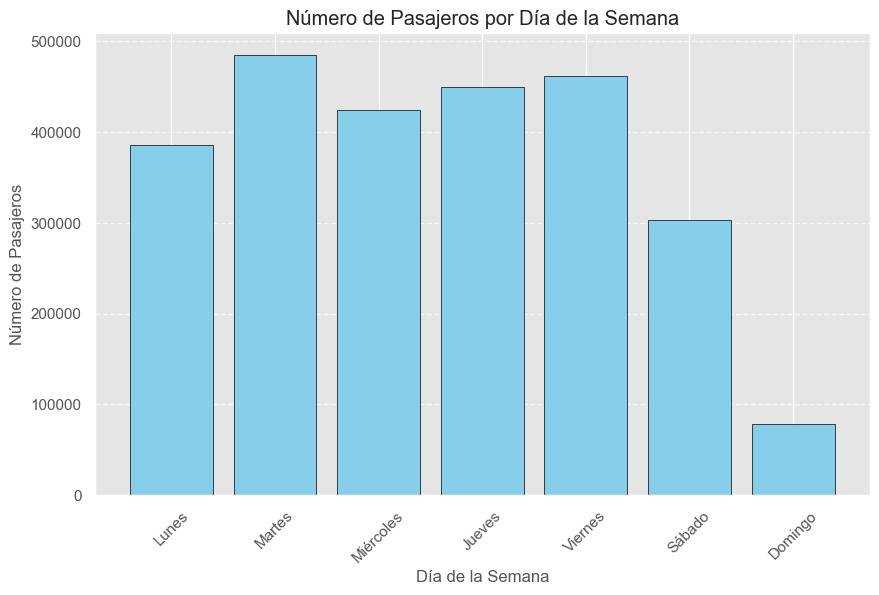

In [258]:
# Agrupar los datos por día de la semana y sumar el número de pasajeros
pasajeros_por_dia = df.groupby('DIA_SEMANA')['PASAJEROS'].sum().reindex(
    ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
).reset_index()

# Graficar el número de pasajeros por día de la semana
plt.bar(pasajeros_por_dia['DIA_SEMANA'], pasajeros_por_dia['PASAJEROS'], color='skyblue', edgecolor='black')
plt.title('Número de Pasajeros por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Pasajeros')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1000x600 with 0 Axes>

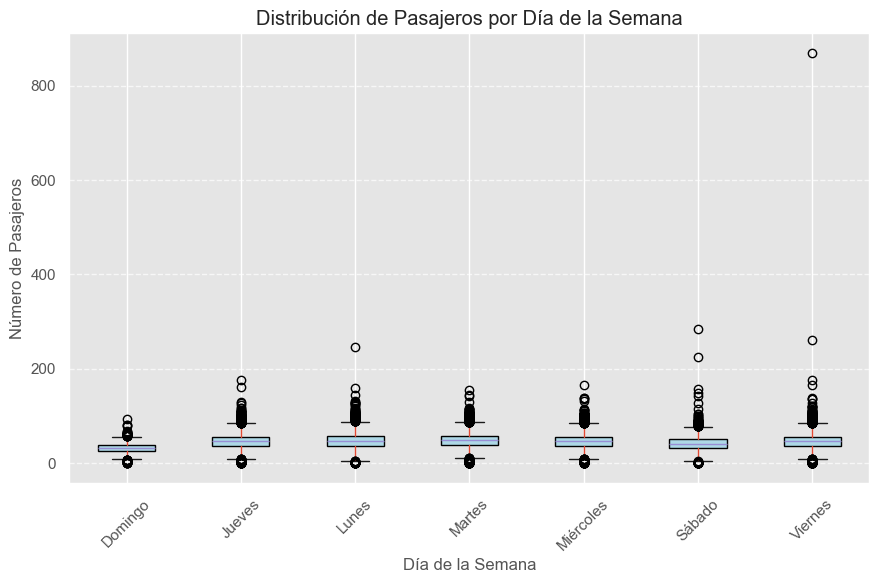

In [259]:
# Crear el boxplot de pasajeros por día de la semana
plt.figure(figsize=(10, 6))
df.boxplot(column='PASAJEROS', by='DIA_SEMANA', patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribución de Pasajeros por Día de la Semana')
plt.suptitle('')  # Eliminar el título automático de pandas
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Pasajeros')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### FILTRO PASAJEROS

C:\Users\deyba\AppData\Local\Temp\ipykernel_28552\3769251549.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('DIA_SEMANA', group_keys=False).apply(filtrar_outliers_por_dia)


<Figure size 1000x600 with 0 Axes>

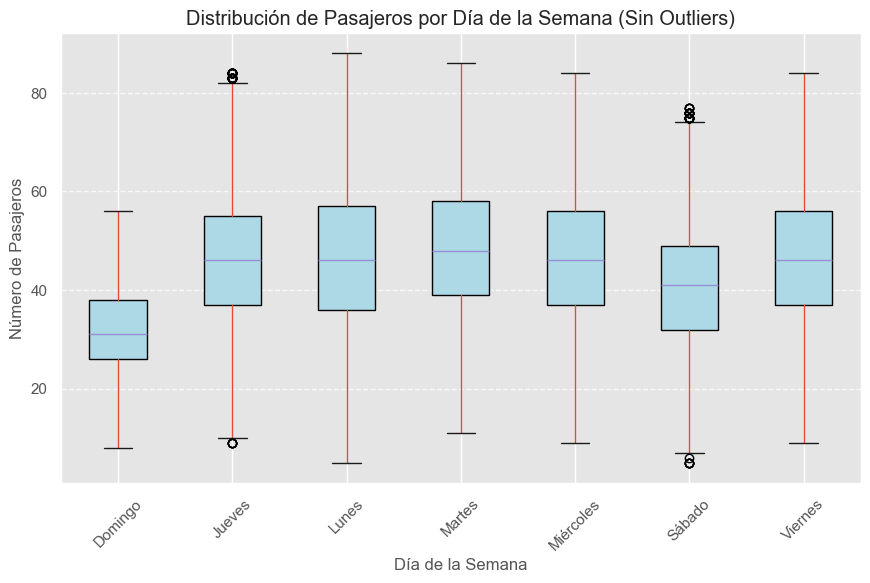

In [260]:
# Aplicar el rango intercuartílico (IQR) por día de la semana
def filtrar_outliers_por_dia(grupo):
    Q1 = grupo['PASAJEROS'].quantile(0.25)  # Primer cuartil
    Q3 = grupo['PASAJEROS'].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return grupo[(grupo['PASAJEROS'] >= limite_inferior) & (grupo['PASAJEROS'] <= limite_superior)]

# Filtrar los datos eliminando los valores atípicos
df = df.groupby('DIA_SEMANA', group_keys=False).apply(filtrar_outliers_por_dia)

# Mostrar el DataFrame filtrado
df.head()

# Opcional: Graficar un boxplot con los datos filtrados
plt.figure(figsize=(10, 6))
df.boxplot(column='PASAJEROS', by='DIA_SEMANA', patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribución de Pasajeros por Día de la Semana (Sin Outliers)')
plt.suptitle('')  # Eliminar el título automático de pandas
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Pasajeros')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Opcional: Guardar los datos  en un archivo CSV
# df.to_csv('datos_pasajeros_filtrado.csv', index=False)


### RUTAS

Las rutas 5 y 6 se eliminan puesto que no son representativas para el análisis.

#### Filtro Rutas

In [261]:
# Filtrar los datos eliminando las filas donde FK_RUTA sea igual a 6 o 5
df = df[~df['FK_RUTA'].isin([5, 6])]

### ESTADO DE DESPACHO

In [262]:
df['ESTADO_DESPACHO'].value_counts()

ESTADO_DESPACHO
2    42004
0     5939
3     2891
4     2144
Name: count, dtype: int64

### Filtro Estado Despacho

In [263]:
df[df['DISTANCIA'] < 15000]['DISTANCIA'].value_counts().sum()

np.int64(336)

In [264]:
df = df[df['ESTADO_DESPACHO'] != 4]

### DISTANCIA DE RECORRIDO

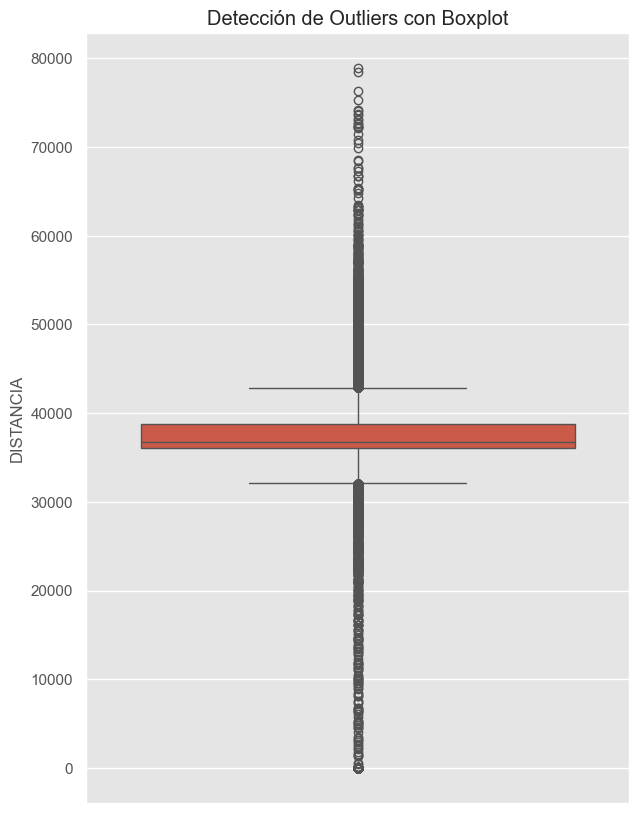

In [265]:
plt.figure(figsize=(7,10))
sns.boxplot(y=df['DISTANCIA'])
plt.title("Detección de Outliers con Boxplot")
plt.show()

In [266]:
mediana = df['DISTANCIA'].median()
mediana

np.float64(36800.0)

Text(0, 0.5, 'Distancia Recorrida')

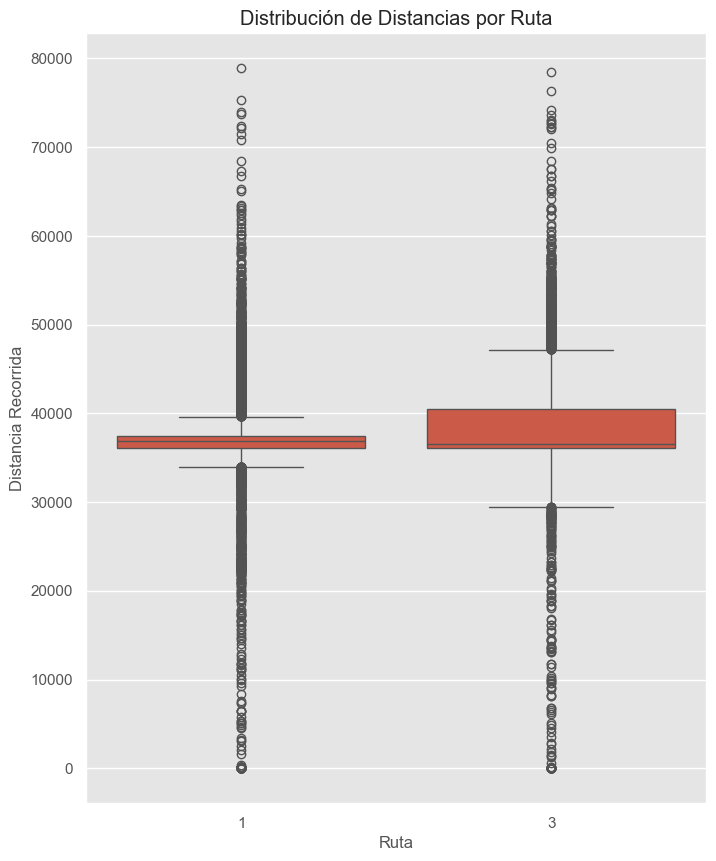

In [267]:

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 10))

# Crear el boxplot con las rutas filtradas
sns.boxplot(x='FK_RUTA', y='DISTANCIA', data=df)

# Añadir título y etiquetas
plt.title("Distribución de Distancias por Ruta")
plt.xlabel("Ruta")
plt.ylabel("Distancia Recorrida")

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50834 entries, 955 to 55631
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   FECHA_INICIAL                50834 non-null  datetime64[ns]
 1   HORA_INICIAL_PLAN            50834 non-null  object        
 2   HORA_INICIAL_REAL            50652 non-null  object        
 3   HORA_INICIAL_AUX             50834 non-null  object        
 4   FECHA_FINAL                  50834 non-null  object        
 5   HORA_FINAL_PLAN              50834 non-null  object        
 6   HORA_FINAL_REAL              44895 non-null  object        
 7   HORA_FINAL_AUX               50834 non-null  object        
 8   FK_RUTA                      50834 non-null  int64         
 9   PASAJEROS                    50834 non-null  int64         
 10  DISTANCIA                    50834 non-null  int64         
 11  FK_VEHICULO                  50834 non-null 

In [269]:
#Calcular el MAD (Desviación Absoluta de la Mediana)
def filtrar_outliers_por_ruta(grupo):
    mediana = grupo.median()
    mad = np.median(np.abs(grupo - mediana))
    lim_sup = mediana + 3 * mad
    lim_inf = max(mediana - 3 * mad, 0)  # Evitar negativos
    mascara = (grupo >= lim_inf) & (grupo <= lim_sup)
    return grupo[mascara].index

indices_validos = df.groupby('FK_RUTA')['DISTANCIA'].apply(filtrar_outliers_por_ruta)
indices_validos_flat = indices_validos.explode()
# para filtrar: df_clean  = df.loc[indices_validos_flat]['DISTANCIA'].describe()

In [270]:
df.loc[indices_validos_flat]['DISTANCIA'].describe()

count    34694.000000
mean     36553.525105
std        865.930106
min      33800.000000
25%      36100.000000
50%      36500.000000
75%      37000.000000
max      39200.000000
Name: DISTANCIA, dtype: float64

No se filtra aún porque se eliminan muchos datos, se filtrará en el calculo del KPI.

### FILTRO DE DATOS FALTANTESS

In [271]:
# Eliminar registros con valores faltantes en las columnas HORA_INICIAL_PLAN o HORA_INICIAL_REAL
df_filtrado = df.dropna(subset=['HORA_INICIAL_PLAN', 'HORA_INICIAL_REAL']) #'HORA_FINAL_REAL'
df_filtrado = df_filtrado.drop(columns=['HORA_INICIAL_AUX','HORA_FINAL_AUX','FK_CONDUCTOR'])


#### TRANSFORMACIÓN A LOS DATOS TEMPORALES

In [272]:

# Asegurar de que las columnas de tiempo estén en formato datetime
if not pd.api.types.is_datetime64_any_dtype(df_filtrado['HORA_INICIAL_PLAN']):
    df_filtrado['HORA_INICIAL_PLAN'] = pd.to_datetime(df_filtrado['FECHA_INICIAL'].astype(str) + ' ' + df_filtrado['HORA_INICIAL_PLAN'], errors='coerce')

if not pd.api.types.is_datetime64_any_dtype(df_filtrado['HORA_INICIAL_REAL']):
    df_filtrado['HORA_INICIAL_REAL'] = pd.to_datetime(df_filtrado['FECHA_INICIAL'].astype(str) + ' ' + df_filtrado['HORA_INICIAL_REAL'], errors='coerce')

# Asegurar de que las columnas de tiempo estén en formato datetime
if not pd.api.types.is_datetime64_any_dtype(df_filtrado['HORA_FINAL_PLAN']):
    df_filtrado['HORA_FINAL_PLAN'] = pd.to_datetime(df_filtrado['FECHA_FINAL'].astype(str) + ' ' + df_filtrado['HORA_FINAL_PLAN'], errors='coerce')

if not pd.api.types.is_datetime64_any_dtype(df_filtrado['HORA_FINAL_REAL']):
    df_filtrado['HORA_FINAL_REAL'] = pd.to_datetime(df_filtrado['FECHA_FINAL'].astype(str) + ' ' + df_filtrado['HORA_FINAL_REAL'], errors='coerce')


In [273]:
df_filtrado.head(10)

,FECHA_INICIAL,HORA_INICIAL_PLAN,HORA_INICIAL_REAL,FECHA_FINAL,HORA_FINAL_PLAN,HORA_FINAL_REAL,FK_RUTA,PASAJEROS,DISTANCIA,FK_VEHICULO,ESTADO_DESPACHO,PK_INTERVALO_DESPACHO,PK_INFORMACION_REGISTRADORA,DIA_SEMANA
956,2024-04-21,2024-04-21 05:00:00,2024-04-21 05:02:14,2024-04-21,2024-04-21 07:59:00,2024-04-21 06:40:05,3,24,30300,16,2,245776,348295,Domingo
957,2024-04-21,2024-04-21 05:30:00,2024-04-21 05:28:13,2024-04-21,2024-04-21 08:29:00,2024-04-21 07:39:15,3,34,40700,38,2,245777,348296,Domingo
958,2024-04-21,2024-04-21 05:40:00,2024-04-21 05:37:41,2024-04-21,2024-04-21 08:21:00,2024-04-21 07:50:41,1,37,38500,75,2,245778,348297,Domingo
959,2024-04-21,2024-04-21 06:00:00,2024-04-21 06:01:32,2024-04-21,2024-04-21 08:41:00,2024-04-21 08:10:51,1,36,38000,84,2,245779,348298,Domingo
960,2024-04-21,2024-04-21 06:12:00,2024-04-21 06:12:06,2024-04-21,2024-04-21 09:11:00,2024-04-21 08:22:00,3,44,42700,4,2,245780,348299,Domingo
962,2024-04-21,2024-04-21 06:35:00,2024-04-21 06:34:14,2024-04-21,2024-04-21 09:16:00,2024-04-21 08:51:34,1,35,35700,72,2,245781,348301,Domingo
963,2024-04-21,2024-04-21 07:25:00,2024-04-21 07:26:11,2024-04-21,2024-04-21 10:06:00,2024-04-21 09:32:20,1,47,38400,54,2,245782,348304,Domingo
964,2024-04-21,2024-04-21 07:55:00,2024-04-21 07:53:28,2024-04-21,2024-04-21 10:36:00,2024-04-21 10:15:11,1,38,39000,38,2,245783,348305,Domingo
965,2024-04-21,2024-04-21 08:05:00,2024-04-21 08:05:35,2024-04-21,2024-04-21 11:04:00,2024-04-21 10:33:30,3,47,42500,75,2,245784,348306,Domingo
966,2024-04-21,2024-04-21 08:30:00,2024-04-21 08:33:14,2024-04-21,2024-04-21 11:11:00,2024-04-21 10:36:39,1,34,39500,4,2,245786,348307,Domingo


#### HORA_INICIAL_PLAN Y HORA_INICIAL_REAL

# CÁLCULO DE KPIs

###  KPI 1: % CUMPLIMIENTO EN LOS TIEMPOS DE DURACIÓN DE LOS VIAJES

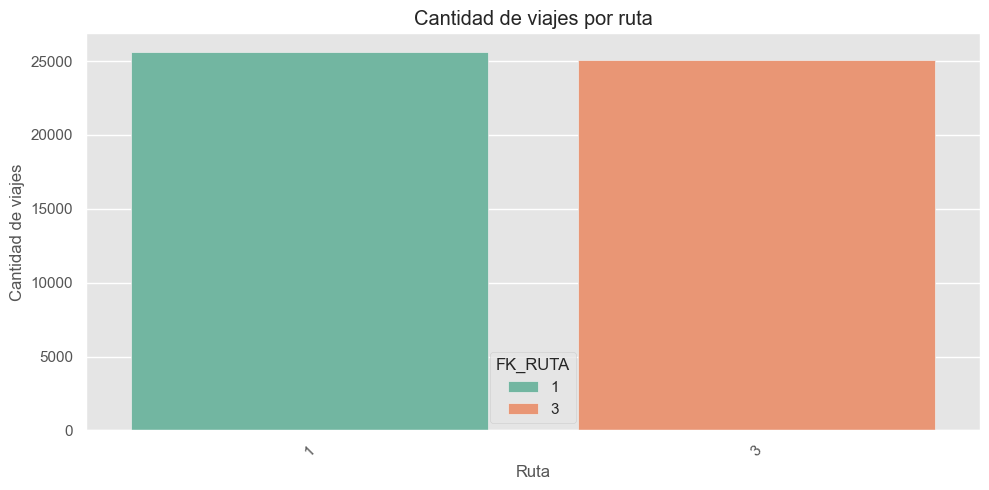

In [274]:
# Visualización: rutas existentes
plt.figure(figsize=(10, 5))
cantidad_viajes = df_filtrado['FK_RUTA'].value_counts().index
sns.countplot(data=df_filtrado, x='FK_RUTA',hue='FK_RUTA', order=cantidad_viajes, palette='Set2')
plt.title('Cantidad de viajes por ruta')
plt.xticks(rotation=45)
plt.ylabel('Cantidad de viajes')
plt.xlabel('Ruta')
plt.tight_layout()
plt.show()

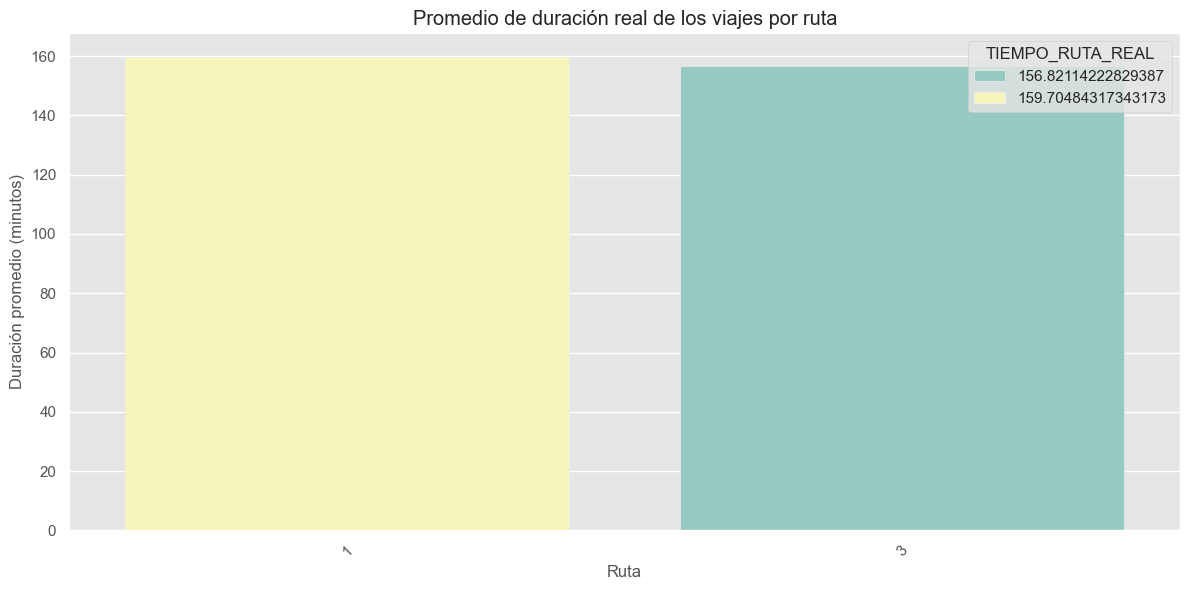

In [275]:
# Asegurar que la columna de duración real esté calculada
if 'TIEMPO_RUTA_REAL' not in df_filtrado.columns:
    df_filtrado['TIEMPO_RUTA_REAL'] = (df_filtrado['HORA_FINAL_REAL'] - df_filtrado['HORA_INICIAL_REAL']).dt.total_seconds() / 60

# Calcular promedio de duración real por ruta
promedio_duracion_ruta = df_filtrado.groupby('FK_RUTA')['TIEMPO_RUTA_REAL'].mean().reset_index()
promedio_duracion_ruta = promedio_duracion_ruta.sort_values(by='TIEMPO_RUTA_REAL', ascending=False)

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(data=promedio_duracion_ruta, x='FK_RUTA', y='TIEMPO_RUTA_REAL', palette='Set3', hue='TIEMPO_RUTA_REAL')
plt.title('Promedio de duración real de los viajes por ruta')
plt.ylabel('Duración promedio (minutos)')
plt.xlabel('Ruta')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

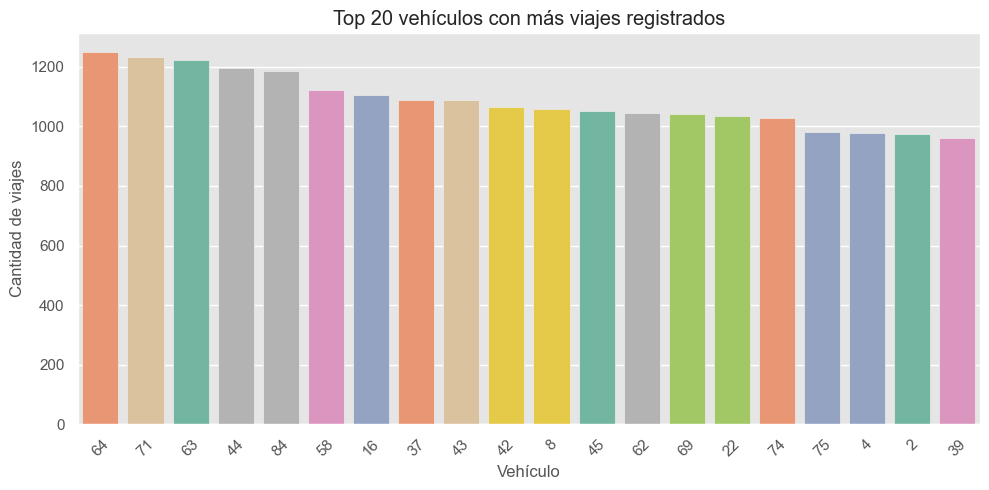

In [276]:
# Visualización: tipos de vehículos
plt.figure(figsize=(10, 5))
orden_vehiculos = df_filtrado['FK_VEHICULO'].value_counts().index[:20]  # Top 20 vehículos
sns.countplot(data=df_filtrado, x='FK_VEHICULO', order=orden_vehiculos, palette='Set2', hue='FK_VEHICULO', legend=False)
plt.title('Top 20 vehículos con más viajes registrados')
plt.xticks(rotation=45)
plt.ylabel('Cantidad de viajes')
plt.xlabel('Vehículo')
plt.tight_layout()
plt.show()

In [277]:
# Calcular tiempo planeado y real en minutos
df_filtrado['TIEMPO_RUTA_PLAN'] = (df_filtrado['HORA_FINAL_PLAN'] - df_filtrado['HORA_INICIAL_PLAN']).dt.total_seconds() / 60
df_filtrado['TIEMPO_RUTA_REAL'] = (df_filtrado['HORA_FINAL_REAL'] - df_filtrado['HORA_INICIAL_REAL']).dt.total_seconds() / 60

# Crear columna de cumplimiento con ventana de ±10 minutos
df_filtrado['CUMPLE_TIEMPO'] = df_filtrado.apply(lambda row: abs(row['TIEMPO_RUTA_PLAN'] - row['TIEMPO_RUTA_REAL']) <= 10, axis=1)

# Calcular KPI general
kpi = (df_filtrado['CUMPLE_TIEMPO'].sum() / len(df)) * 100
print(f"✅ KPI - Porcentaje de cumplimiento en tiempo: {kpi:.2f}%\n")

✅ KPI - Porcentaje de cumplimiento en tiempo: 34.59%



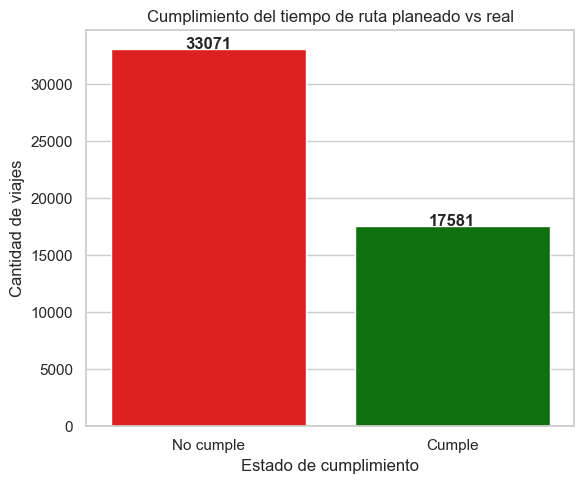

In [278]:
# Visualización: vehículos que cumplen vs. no cumplen
cumple_counts = df_filtrado['CUMPLE_TIEMPO'].value_counts().rename(index={True: 'Cumple', False: 'No cumple'})
sns.set(style="whitegrid")
plt.figure(figsize=(6, 5))
sns.barplot(x=cumple_counts.index, y=cumple_counts.values, hue=cumple_counts.index, palette=['red', 'green'])
plt.title('Cumplimiento del tiempo de ruta planeado vs real')
plt.ylabel('Cantidad de viajes')
plt.xlabel('Estado de cumplimiento')
for i, v in enumerate(cumple_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

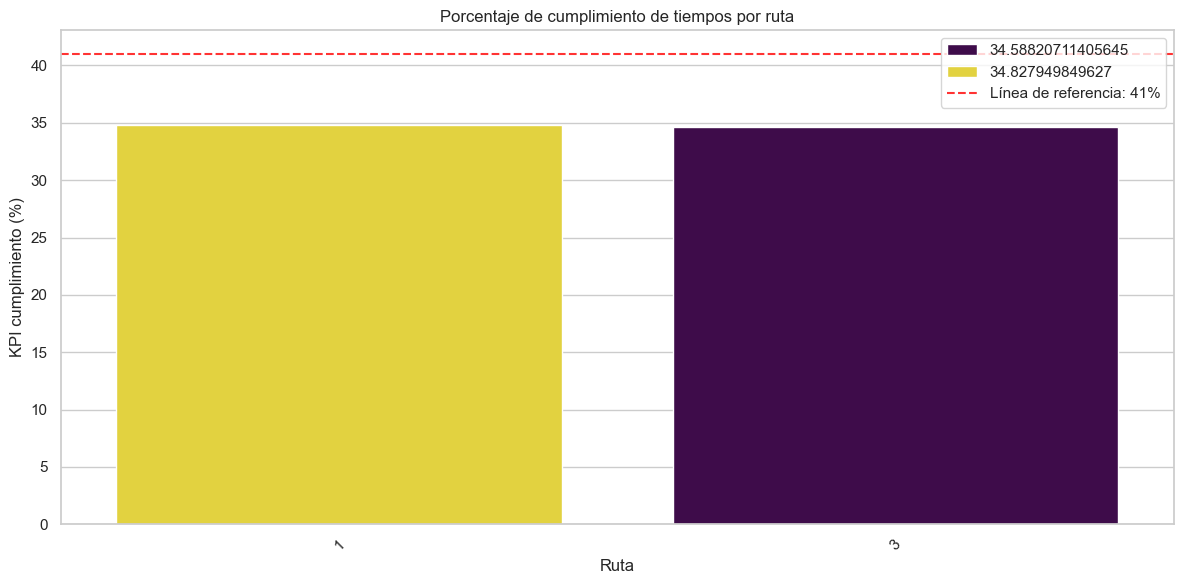

In [279]:
# Agrupar por FK_RUTA y calcular cumplimiento por ruta
cumplimiento_rutas = df_filtrado.groupby('FK_RUTA')['CUMPLE_TIEMPO'].mean().reset_index()
cumplimiento_rutas['KPI_CUMPLIMIENTO_%'] = cumplimiento_rutas['CUMPLE_TIEMPO'] * 100

# Visualizar el KPI por ruta
plt.figure(figsize=(12, 6))
sns.barplot(data=cumplimiento_rutas, x='FK_RUTA', y='KPI_CUMPLIMIENTO_%',hue='KPI_CUMPLIMIENTO_%', palette='viridis')
plt.title('Porcentaje de cumplimiento de tiempos por ruta')
plt.ylabel('KPI cumplimiento (%)')
plt.xlabel('Ruta')
plt.xticks(rotation=45)
plt.axhline(41, color='red', linestyle='--', label='Línea de referencia: 41%', alpha=0.8)
plt.legend()
plt.tight_layout()
plt.show()


In [280]:
# Agrupar por FK_VEHICULO y calcular porcentaje de cumplimiento
cumplimiento_vehiculos = df_filtrado.groupby('FK_VEHICULO')['CUMPLE_TIEMPO'].mean().reset_index()
cumplimiento_vehiculos['KPI_CUMPLIMIENTO_%'] = cumplimiento_vehiculos['CUMPLE_TIEMPO'] * 100

# Ordenar descendente y ascendente
top_10_cumplen = cumplimiento_vehiculos.sort_values(by='KPI_CUMPLIMIENTO_%', ascending=False).head(10)
top_10_no_cumplen = cumplimiento_vehiculos.sort_values(by='KPI_CUMPLIMIENTO_%', ascending=True).head(10)

# Mostrar resultados en consola
print("✅ Top 10 vehículos que más cumplen:\n", top_10_cumplen[['FK_VEHICULO', 'KPI_CUMPLIMIENTO_%']])
print("\n❌ Top 10 vehículos que menos cumplen:\n", top_10_no_cumplen[['FK_VEHICULO', 'KPI_CUMPLIMIENTO_%']])

✅ Top 10 vehículos que más cumplen:
     FK_VEHICULO  KPI_CUMPLIMIENTO_%
42           56           47.619048
32           45           45.765937
43           58           45.187166
46           61           44.907975
54           71           44.318182
18           30           42.816092
38           51           41.241379
50           66           40.557668
17           28           40.549828
7            11           40.354536

❌ Top 10 vehículos que menos cumplen:
     FK_VEHICULO  KPI_CUMPLIMIENTO_%
65           92            0.000000
4             6           24.342105
30           43           24.356618
10           16           25.135624
24           36           25.193798
36           49           25.531915
59           76           26.086957
1             3           27.672956
26           38           28.629857
2             4           28.732106


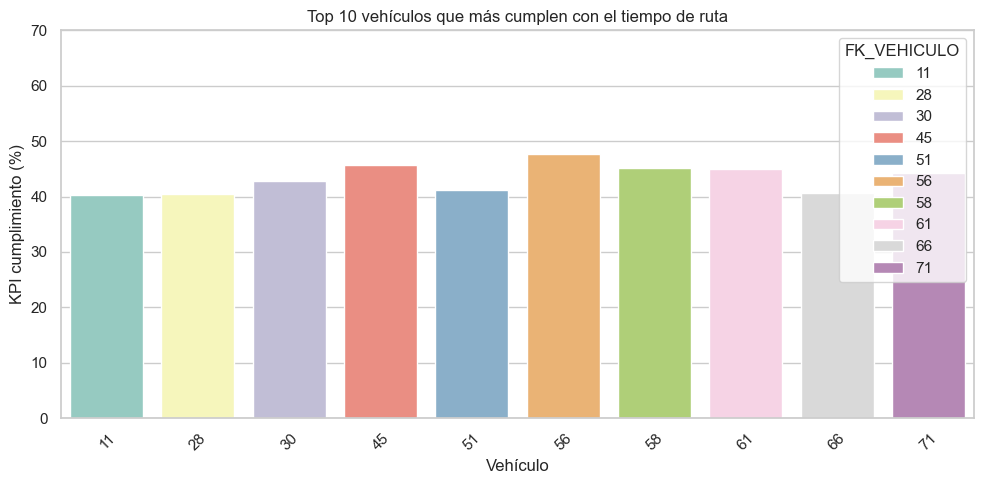

In [281]:
# Visualizar Top 10 que más cumplen con el tiempo de ruta
plt.figure(figsize=(10, 5))
color = sns.color_palette("Set3", n_colors=10) 
sns.barplot(data=top_10_cumplen, x='FK_VEHICULO', y='KPI_CUMPLIMIENTO_%', hue='FK_VEHICULO', palette=color)
plt.title('Top 10 vehículos que más cumplen con el tiempo de ruta')
plt.ylabel('KPI cumplimiento (%)')
plt.xlabel('Vehículo')
plt.ylim(0, 70)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

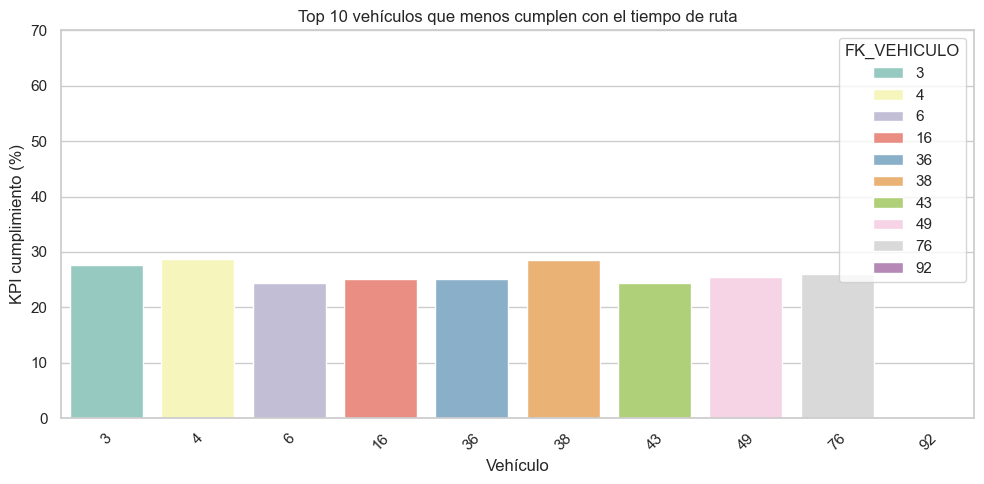

In [282]:
# Visualizar Top 10 que menos cumplen con el tiempo de ruta
plt.figure(figsize=(10, 5))
color = sns.color_palette("Set3", n_colors=10) 
sns.barplot(data=top_10_no_cumplen, x='FK_VEHICULO', y='KPI_CUMPLIMIENTO_%',hue='FK_VEHICULO', palette=color)
plt.title('Top 10 vehículos que menos cumplen con el tiempo de ruta')
plt.ylabel('KPI cumplimiento (%)')
plt.xlabel('Vehículo')
plt.ylim(0, 70)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [283]:
df_filtrado["DIFERENCIA_TIEMPO"] = df_filtrado["TIEMPO_RUTA_REAL"] - df_filtrado["TIEMPO_RUTA_PLAN"]

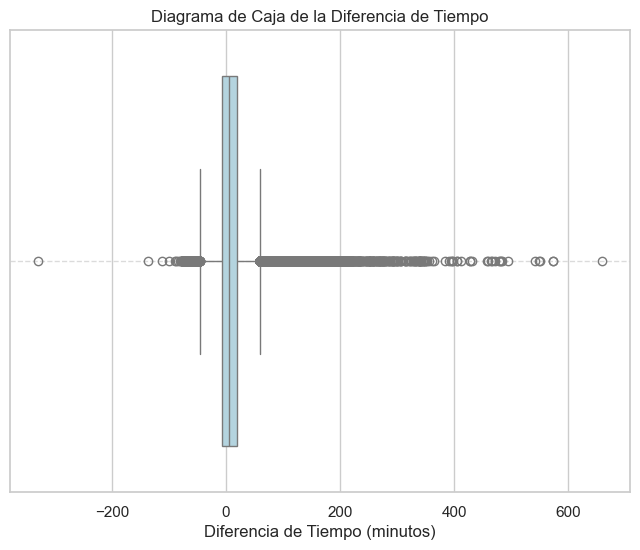

In [284]:
#Crear un diagrama de caja (boxplot) para la diferencia de tiempo
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtrado['DIFERENCIA_TIEMPO'], color='lightblue')
plt.title('Diagrama de Caja de la Diferencia de Tiempo')
plt.xlabel('Diferencia de Tiempo (minutos)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [285]:
df_filtrado.to_csv("Datos/datos_filtrados.csv")

### KPI 2 : ASIGNACIÓN EQUITATIVA DE DESPACHOS DE VEHICULOS EN TIEMPOS DE ALTA DEMANDA

In [286]:
df_filtrado['HORA_REAL'] = pd.to_datetime(df_filtrado['HORA_INICIAL_REAL'], errors='coerce')
df_filtrado['HORA_DIA'] = df_filtrado['HORA_REAL'].dt.hour


In [287]:
pasajeros_por_hora = df_filtrado.groupby('HORA_DIA').agg(
    TOTAL_PASAJEROS=('PASAJEROS', 'sum'),
    TOTAL_DESPACHOS=('PASAJEROS', 'size')  # Cuenta todas las filas del grupo
).reset_index()
pasajeros_ordenados= pasajeros_por_hora.sort_values('TOTAL_PASAJEROS', ascending=False)
pasajeros_ordenados

,HORA_DIA,TOTAL_PASAJEROS,TOTAL_DESPACHOS
2,6,229984,4525
1,5,228715,4817
11,15,199663,3684
4,8,194093,4136
3,7,191047,4011
9,13,180309,3844
10,14,179624,3548
8,12,175760,3842
5,9,174172,4223
6,10,157009,3873


In [288]:
num_horas_pico = max(1, int(len(pasajeros_por_hora) * 0.33))
horas_pico_lista = pasajeros_ordenados.head(num_horas_pico)['HORA_DIA'].tolist()
horas_pico_lista = sorted(horas_pico_lista)  # Ordenar las horas pico
print(f"Las horas pico identificadas son: {horas_pico_lista}")

Las horas pico identificadas son: [5, 6, 7, 8, 15]


In [289]:
df_pico = df_filtrado[df_filtrado['HORA_DIA'].isin(horas_pico_lista)]

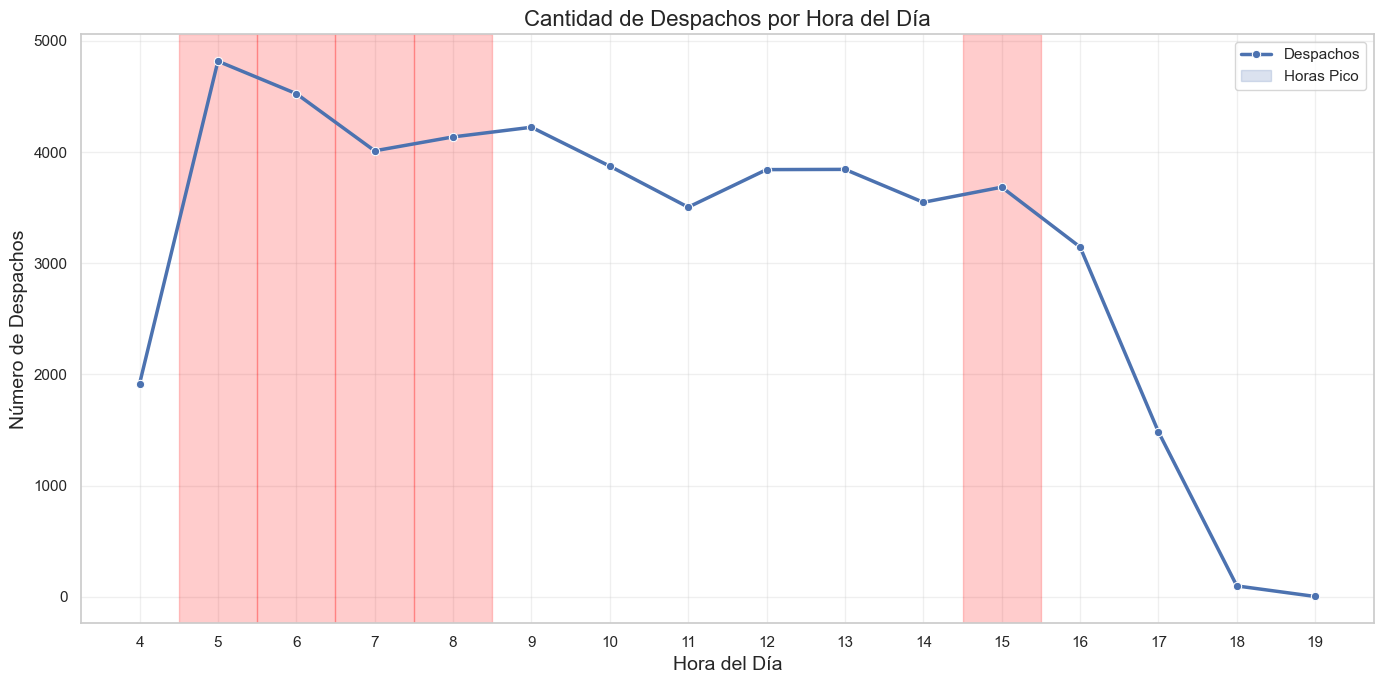

In [290]:
# Análisis de despachos por hora del día (todas las horas)
despachos_por_hora = df_filtrado.groupby('HORA_DIA').size().reset_index(name='NUM_DESPACHOS')
despachos_por_hora = despachos_por_hora.sort_values('HORA_DIA')

despachos_dia_hora = df_filtrado.groupby(['DIA_SEMANA', 'HORA_DIA']).agg({
    'FK_VEHICULO': 'count',  # Número de despachos
    'PASAJEROS': 'sum'      # Total de pasajeros
}).reset_index()

despachos_dia_hora.columns = ['DIA_SEMANA', 'HORA_DIA', 'NUM_DESPACHOS', 'TOTAL_PASAJEROS']

# Asegurar que los días estén en el orden correcto
despachos_dia_hora['orden_dia'] = despachos_dia_hora['DIA_SEMANA'].map(
    {dia: i for i, dia in enumerate(dias_es)}
)
despachos_dia_hora = despachos_dia_hora.sort_values(['orden_dia', 'HORA_DIA'])


plt.figure(figsize=(14, 7))
sns.lineplot(x='HORA_DIA', y='NUM_DESPACHOS', data=despachos_por_hora, marker='o', linewidth=2.5)

# Horas pico destacadas
for hora in horas_pico_lista:
    plt.axvspan(hora-0.5, hora+0.5, alpha=0.2, color='red')

plt.title('Cantidad de Despachos por Hora del Día', fontsize=16)
plt.xlabel('Hora del Día', fontsize=14)
plt.ylabel('Número de Despachos', fontsize=14)
plt.xticks(range(min(despachos_por_hora['HORA_DIA']), max(despachos_por_hora['HORA_DIA'])+1))
plt.grid(True, alpha=0.3)
plt.legend(['Despachos', 'Horas Pico'], loc='upper right')
plt.tight_layout()
plt.savefig('linea_despachos_hora.png')
plt.show()

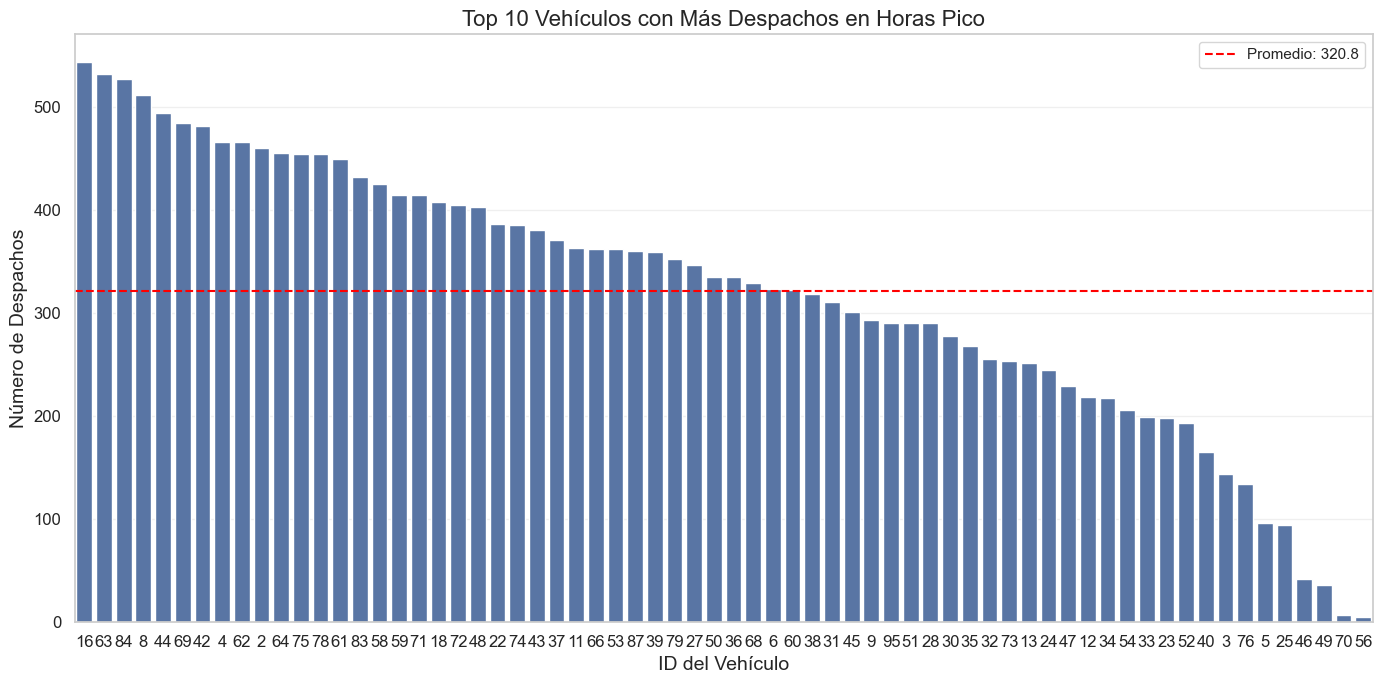

In [291]:
# 7. Gráfico de barras - Top 10 vehículos con más despachos en horas pico
despachos_vehiculo = df_pico.groupby(['FK_VEHICULO']).size().reset_index(name='num_despachos')
despachos_vehiculo = despachos_vehiculo.sort_values('num_despachos', ascending=False)

plt.figure(figsize=(14, 7))
top_vehiculos = despachos_vehiculo.sort_values("num_despachos", ascending=False)
sns.barplot(x='FK_VEHICULO', y='num_despachos', 
            data=top_vehiculos, 
            order=top_vehiculos['FK_VEHICULO'].tolist())
plt.axhline(y=despachos_vehiculo['num_despachos'].mean(), color='red', linestyle='--',
           label=f'Promedio: {despachos_vehiculo["num_despachos"].mean():.1f}')
plt.title('Top 10 Vehículos con Más Despachos en Horas Pico', fontsize=16)
plt.xlabel('ID del Vehículo', fontsize=14)
plt.ylabel('Número de Despachos', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
# plt.savefig('top_vehiculos.png')
plt.show()

### KPI 3 : (%) CUMPLIMIENTO EN LAS DISTANCIAS DE DURACIÓN DE LOS VIAJES

In [292]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50652 entries, 956 to 55631
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   FECHA_INICIAL                50652 non-null  datetime64[ns]
 1   HORA_INICIAL_PLAN            50652 non-null  datetime64[ns]
 2   HORA_INICIAL_REAL            50652 non-null  datetime64[ns]
 3   FECHA_FINAL                  50652 non-null  object        
 4   HORA_FINAL_PLAN              50652 non-null  datetime64[ns]
 5   HORA_FINAL_REAL              44724 non-null  datetime64[ns]
 6   FK_RUTA                      50652 non-null  int64         
 7   PASAJEROS                    50652 non-null  int64         
 8   DISTANCIA                    50652 non-null  int64         
 9   FK_VEHICULO                  50652 non-null  int64         
 10  ESTADO_DESPACHO              50652 non-null  int64         
 11  PK_INTERVALO_DESPACHO        50652 non-null 

In [293]:
df_filtrado.shape

(50652, 20)

In [294]:
# Función para filtrar outliers en todo el DataFrame
def filtrar_outliers_por_ruta(grupo):
    mediana = grupo['DISTANCIA'].median()
    mad = np.median(np.abs(grupo['DISTANCIA'] - mediana))
    lim_sup = mediana + 3 * mad
    lim_inf = max(mediana - 3 * mad, 0)  # Evitar negativos
    return grupo[(grupo['DISTANCIA'] >= lim_inf) & (grupo['DISTANCIA'] <= lim_sup)]

# Aplicar la función, asegurando que 'FK_RUTA' se mantenga
df_filtrado = df_filtrado.groupby('FK_RUTA', group_keys=False).apply(filtrar_outliers_por_ruta)

# Asegurar que 'FK_RUTA' sigue en el DataFrame después del filtrado
#df_clean = df_clean.reset_index(drop=True)

# Verificar el resultado

C:\Users\deyba\AppData\Local\Temp\ipykernel_28552\452123065.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtrado = df_filtrado.groupby('FK_RUTA', group_keys=False).apply(filtrar_outliers_por_ruta)


In [295]:
def evaluar_cumplimiento_distancia(df, columna_distancia='DISTANCIA', columna_ruta='FK_RUTA'):
    medianas_por_ruta = df.groupby(columna_ruta)[columna_distancia].median().to_dict()
    
    # Paso 2: Para cada viaje, calcular límites ±5% de la mediana de su ruta
    df['limite_inferior'] = df[columna_ruta].map(medianas_por_ruta) * 0.95
    df['limite_superior'] = df[columna_ruta].map(medianas_por_ruta) * 1.05
    
    # Paso 3: Clasificar cumplimiento
    df['CUMPLIMIENTO'] = np.where(
        df[columna_distancia].between(df['limite_inferior'], df['limite_superior']),
        'SI_CUMPLE',
        'NO_CUMPLE'
    )
    
    # Opcional: Eliminar columnas temporales de límites
    df.drop(['limite_inferior', 'limite_superior'], axis=1, inplace=True)
    
    return df

In [296]:
df_prueba = evaluar_cumplimiento_distancia(df_filtrado, columna_distancia='DISTANCIA', columna_ruta='FK_RUTA')

In [297]:
df_prueba['CUMPLIMIENTO'].value_counts()

CUMPLIMIENTO
SI_CUMPLE    32068
NO_CUMPLE     2531
Name: count, dtype: int64

### KPI 4: MEJORA DEL TIEMPO PROMEDIO - ENTRE DESPACHOS

In [298]:
# Mostrar las primeras filas para verificar
print(df_filtrado[['HORA_INICIAL_PLAN', 'HORA_INICIAL_REAL', 'DIFERENCIA_TIEMPO']].head())

      HORA_INICIAL_PLAN   HORA_INICIAL_REAL  DIFERENCIA_TIEMPO
958 2024-04-21 05:40:00 2024-04-21 05:37:41         -28.000000
959 2024-04-21 06:00:00 2024-04-21 06:01:32         -31.683333
962 2024-04-21 06:35:00 2024-04-21 06:34:14         -23.666667
963 2024-04-21 07:25:00 2024-04-21 07:26:11         -34.850000
964 2024-04-21 07:55:00 2024-04-21 07:53:28         -19.283333


In [299]:
despachos_por_dia_ruta = df.groupby(['DIA_SEMANA', 'FK_RUTA']).size().reset_index(name='CANTIDAD_DESPACHOS')

In [300]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34599 entries, 958 to 55624
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   FECHA_INICIAL                34599 non-null  datetime64[ns]
 1   HORA_INICIAL_PLAN            34599 non-null  datetime64[ns]
 2   HORA_INICIAL_REAL            34599 non-null  datetime64[ns]
 3   FECHA_FINAL                  34599 non-null  object        
 4   HORA_FINAL_PLAN              34599 non-null  datetime64[ns]
 5   HORA_FINAL_REAL              33370 non-null  datetime64[ns]
 6   FK_RUTA                      34599 non-null  int64         
 7   PASAJEROS                    34599 non-null  int64         
 8   DISTANCIA                    34599 non-null  int64         
 9   FK_VEHICULO                  34599 non-null  int64         
 10  ESTADO_DESPACHO              34599 non-null  int64         
 11  PK_INTERVALO_DESPACHO        34599 non-null 

In [301]:
df_filtrado['CUMPLIMIENTO']

958      SI_CUMPLE
959      SI_CUMPLE
962      SI_CUMPLE
963      SI_CUMPLE
964      NO_CUMPLE
           ...    
55524    SI_CUMPLE
55530    SI_CUMPLE
55532    SI_CUMPLE
55533    SI_CUMPLE
55624    SI_CUMPLE
Name: CUMPLIMIENTO, Length: 34599, dtype: object

In [302]:
def calcular_frecuencia_despacho(grupo):
    try:
        # Ordenar por fecha y hora para asegurar el cálculo correcto
        grupo = grupo.sort_values(by=['FECHA_INICIAL', 'HORA_INICIAL_REAL'])
        
        # Calcular la diferencia en minutos entre registros consecutivos
        grupo['T_DESPACHO'] = grupo['HORA_INICIAL_REAL'].diff().dt.total_seconds() / 60
        
        # Reemplazar el primer valor de cada día con 0 minutos
        grupo['DIF_FECHA'] = grupo['FECHA_INICIAL'].diff().dt.days.fillna(0)
        grupo.loc[grupo['DIF_FECHA'] != 0, 'T_DESPACHO'] = 0
        
        # Asegurar que no haya valores nulos en 'F_DESPACHO'
        grupo['T_DESPACHO'] = grupo['T_DESPACHO'].fillna(0)
        
        # Eliminar la columna auxiliar 'DIF_FECHA'
        grupo = grupo.drop(columns=['DIF_FECHA'])
        
    except Exception as e:
        # Imprimir el error y los valores problemáticos
        print("Error en el cálculo de frecuencia de despacho:")
        print(f"Grupo problemático (FK_RUTA): {grupo['FK_RUTA'].iloc[0] if not grupo.empty else 'Desconocido'}")
        print(f"Valores del grupo:\n{grupo[['FECHA_INICIAL', 'HORA_INICIAL_REAL']]}")
        print(f"Error: {e}")
        raise  # Volver a lanzar la excepción para depuración adicional
    
    return grupo

df_filtrado = df_filtrado.groupby('FK_RUTA', group_keys=False).apply(calcular_frecuencia_despacho)

C:\Users\deyba\AppData\Local\Temp\ipykernel_28552\2892848837.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtrado = df_filtrado.groupby('FK_RUTA', group_keys=False).apply(calcular_frecuencia_despacho)


In [303]:
df_filtrado.to_csv("Datos/datos_filtrados.csv")

In [304]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34599 entries, 7 to 56044
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   FECHA_INICIAL                34599 non-null  datetime64[ns]
 1   HORA_INICIAL_PLAN            34599 non-null  datetime64[ns]
 2   HORA_INICIAL_REAL            34599 non-null  datetime64[ns]
 3   FECHA_FINAL                  34599 non-null  object        
 4   HORA_FINAL_PLAN              34599 non-null  datetime64[ns]
 5   HORA_FINAL_REAL              33370 non-null  datetime64[ns]
 6   FK_RUTA                      34599 non-null  int64         
 7   PASAJEROS                    34599 non-null  int64         
 8   DISTANCIA                    34599 non-null  int64         
 9   FK_VEHICULO                  34599 non-null  int64         
 10  ESTADO_DESPACHO              34599 non-null  int64         
 11  PK_INTERVALO_DESPACHO        34599 non-null  i

# CARGA A BASE DE DATOS :

In [305]:
import os
import mysql.connector
from mysql.connector import Error

def conectar_bd(database):
    """
    Conecta a la base de datos usando mysql-connector-python.
    Ajusta host, usuario y contraseña según tus variables de entorno o valores por defecto.
    """
    try:
        conexion = mysql.connector.connect(
            host=os.getenv("DB_HOST", "147.93.47.161"),
            user=os.getenv("DB_USER", "masterbus"),
            password=os.getenv("DB_PASSWORD", "9@#$%&yhif"),
            database=database
        )
        if conexion.is_connected():
            print(f"✅ Conexión a la base de datos {database} establecida.")
            return conexion
    except Error as e:
        print(f"❌ Error al conectar a MySQL ({database}): {e}")
        return None

def crear_tabla_datos_filtrados(database):
    """
    Verifica si la tabla datos_filtrados existe en bd_montebello_rdw.
    Si no existe, la crea con los campos requeridos.
    """
    
    conexion = conectar_bd(database)
    if not conexion:
        return
    
    try:
        cursor = conexion.cursor()
        
        # 1. Verificamos si la tabla existe
        cursor.execute("SHOW TABLES LIKE 'datos_filtrados'")
        resultado = cursor.fetchone()
        
        if resultado:
            print("ℹ️ La tabla 'datos_filtrados' ya existe. No se creó nuevamente.")
        else:
            # 2. Definición de la tabla (ajusta tipos de columna según tu necesidad)
            query_crear_tabla = """
            CREATE TABLE datos_filtrados (
                FECHA_INICIAL DATE,
                HORA_INICIAL_PLAN TIME,
                HORA_INICIAL_REAL TIME NULL,
                FECHA_FINAL DATE,
                HORA_FINAL_PLAN TIME,
                HORA_FINAL_REAL TIME,
                FK_RUTA INT,
                PASAJEROS INT,
                DISTANCIA DECIMAL(10, 2),
                FK_VEHICULO INT,
                ESTADO_DESPACHO TINYINT(1),
                PK_INTERVALO_DESPACHO INT,
                PK_INFORMACION_REGISTRADORA INT,
                DIA_SEMANA VARCHAR(20),
                HORA_REAL TIME,
                HORA_DIA TIME,
                CUMPLIMIENTO VARCHAR(20),
                T_REAL_MIN FLOAT,
                T_PLANEADO_MIN FLOAT,
                CUMPLIMIENTO_DURACION VARCHAR(20) NULL,
                DIFERENCIA_DURACION FLOAT NULL,
                T_DESPACHO FLOAT NULL
            );
            """
            cursor.execute(query_crear_tabla)
            conexion.commit()
            print("✅ Tabla 'datos_filtrados' creada exitosamente.")
    
    except Error as e:
        print(f"❌ Error al crear/verificar la tabla: {e}")
    finally:
        cursor.close()
        conexion.close()
        print("🔒 Conexión cerrada.")

if __name__ == "__main__":
    # Llamamos a la función indicando el nombre exacto de la base de datos
    crear_tabla_datos_filtrados("bd_montebello_rdw")

✅ Conexión a la base de datos bd_montebello_rdw establecida.
ℹ️ La tabla 'datos_filtrados' ya existe. No se creó nuevamente.
🔒 Conexión cerrada.


In [306]:
# -------------------------------------------------------------------
# Función para conectar a la base de datos
# -------------------------------------------------------------------
def conectar_bd(database):
    """
    Conecta a la base de datos 'database' usando mysql-connector-python.
    Ajusta host, usuario y contraseña según tus variables de entorno o valores por defecto.
    """
    try:
        conexion = mysql.connector.connect(
            host=os.getenv("DB_HOST", "147.93.47.161"),
            user=os.getenv("DB_USER", "masterbus"),
            password=os.getenv("DB_PASSWORD", "9@#$%&yhif"),
            database=database
        )
        if conexion.is_connected():
            print(f"✅ Conexión a la base de datos {database} establecida.")
            return conexion
    except Error as e:
        print(f"❌ Error al conectar a MySQL ({database}): {e}")
        return None


In [309]:
# -------------------------------------------------------------------
# Función para cargar datos desde un DataFrame de pandas
# -------------------------------------------------------------------
def carga_df(database, df):
    """
    Toma un DataFrame de pandas y lo inserta en la tabla 'datos_filtrados' de la base de datos 'database'.
    
    :param database: Nombre de la base de datos (por ejemplo 'bd_montebello_rdw').
    :param df: DataFrame con las columnas correspondientes a la tabla datos_filtrados.
    """
    conexion = conectar_bd(database)
    if not conexion:
        return
    
    try:
        cursor = conexion.cursor()

        insert_query = """
            INSERT INTO datos_filtrados (
                FECHA_INICIAL,
                HORA_INICIAL_PLAN,
                HORA_INICIAL_REAL,
                FECHA_FINAL,
                HORA_FINAL_PLAN,
                HORA_FINAL_REAL,
                FK_RUTA,
                PASAJEROS,
                DISTANCIA,
                FK_VEHICULO,
                ESTADO_DESPACHO,
                PK_INTERVALO_DESPACHO,
                PK_INFORMACION_REGISTRADORA,
                DIA_SEMANA,
                HORA_REAL,
                HORA_DIA,
                CUMPLIMIENTO,
                T_REAL_MIN,
                T_PLANEADO_MIN,
                TIEMPO_RUTA_PLAN,
                TIEMPO_RUTA_REAL,
                CUMPLIMIENTO_DURACION,
                DIFERENCIA_DURACION,
                T_DESPACHO
            ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        """
        
        # Construimos una lista de tuplas con los valores a insertar desde el df
        registros = []
        for _, row in df.iterrows():
            tupla = (
                row["FECHA_INICIAL"], 
                row["HORA_INICIAL_PLAN"],
                row["HORA_INICIAL_REAL"],
                row["FECHA_FINAL"],
                row["HORA_FINAL_PLAN"],
                row["HORA_FINAL_REAL"],
                row["FK_RUTA"],
                row["PASAJEROS"],
                row["DISTANCIA"],
                row["FK_VEHICULO"],
                row["ESTADO_DESPACHO"],
                row["PK_INTERVALO_DESPACHO"],
                row["PK_INFORMACION_REGISTRADORA"],
                row["DIA_SEMANA"],
                row["HORA_REAL"],
                row["HORA_DIA"],
                row["CUMPLIMIENTO"],
                row["T_REAL_MIN"],
                row["T_PLANEADO_MIN"],
                row["TIEMPO_RUTA_PLAN"],
                row["TIEMPO_RUTA_REAL"],
                row["CUMPLIMIENTO_DURACION"],
                row["DIFERENCIA_DURACION"],
                row["T_DESPACHO"]
            )
            registros.append(tupla)
        
        cursor.executemany(insert_query, registros)
        conexion.commit()
        
        print(f"✅ Se han insertado {cursor.rowcount} registros en la tabla 'Datos/datos_filtrados'.")
    
    except Error as e:
        print(f"❌ Error al insertar registros desde DataFrame: {e}")
    finally:
        cursor.close()
        conexion.close()
        print("🔒 Conexión cerrada.")


In [310]:
# -------------------------------------------------------------------
# Funcion principal para ejecutar las cargas
# -------------------------------------------------------------------
if __name__ == "__main__":
    # 1. Carga desde CSV
    # 1. Lee el CSV con pandas
    try:
        csv_path = "Datos/datos_filtrados.csv"
        df = df_filtrado
        # 2. Opcional: mostrar info
        df.info()
        print(f"ℹ️ Archivo CSV '{csv_path}' cargado con {len(df)} registros (todas las columnas).")
        
        # 3. Elimina la primera columna si no la necesitas (Unnamed: 0)
        #    Si tu DataFrame siempre trae 19 columnas y la primera es Unnamed: 0, haz lo siguiente:
        df.drop(columns=["Unnamed: 0"], inplace=True)
        # O, si prefieres usar iloc:
        # df = df.iloc[:, 1:]
        
        # 4. Reemplazar NaN por None en todo el DataFrame
        df = df.replace({np.nan: None})
        
        carga_df("bd_montebello_rdw", df)
    except FileNotFoundError:
        print(f"❌ No se encontró el archivo CSV: {csv_path}")
        
    except Exception as e:
        print(f"❌ Error al leer el CSV: {e}")

<class 'pandas.core.frame.DataFrame'>
Index: 34599 entries, 7 to 56044
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   FECHA_INICIAL                34599 non-null  datetime64[ns]
 1   HORA_INICIAL_PLAN            34599 non-null  datetime64[ns]
 2   HORA_INICIAL_REAL            34599 non-null  datetime64[ns]
 3   FECHA_FINAL                  34599 non-null  object        
 4   HORA_FINAL_PLAN              34599 non-null  datetime64[ns]
 5   HORA_FINAL_REAL              33370 non-null  datetime64[ns]
 6   FK_RUTA                      34599 non-null  int64         
 7   PASAJEROS                    34599 non-null  int64         
 8   DISTANCIA                    34599 non-null  int64         
 9   FK_VEHICULO                  34599 non-null  int64         
 10  ESTADO_DESPACHO              34599 non-null  int64         
 11  PK_INTERVALO_DESPACHO        34599 non-null  i